In [21]:
import cv2
import numpy as np
from PIL import Image
import glob
from os.path import join
from joblib import Parallel, delayed
import multiprocessing as mp
import seaborn as sns

In [12]:
img_dir = '/home/zal/Data/DETRAC/DETRAC-Train-Data-Orientation'
print(len(glob.glob(join(img_dir, '*.jpg'))))

598281


### Color Analysis

In [3]:
def get_img_mean(img_path):
    img = cv2.imread(img_path)
    row_mean_color = np.mean(img, axis=0)
    mean_color = np.mean(row_mean_color, axis=0) / 255.0
    return mean_color

In [7]:
color_means = Parallel(n_jobs=mp.cpu_count())(delayed(get_img_mean)(img_path=file_path) for file_path in glob.glob(join(img_dir, '*.jpg')))

In [11]:
print(len(color_means))
print(np.mean(color_means, axis=0))
print(np.std(color_means, axis=0))

598281
[0.47433634 0.4657492  0.46872237]
[0.11906589 0.11330419 0.10787867]


### Shape analysis

In [13]:
def get_img_shape(img_path):
    return Image.open(img_path).size

In [23]:
img_shapes = Parallel(n_jobs=mp.cpu_count())(delayed(get_img_shape)(img_path=file_path) for file_path in glob.glob(join(img_dir, '*.jpg')))

In [24]:
print(len(img_shapes))
print(img_shapes[-1])
print(np.mean(img_shapes, axis=0))
print(np.std(img_shapes, axis=0))
print(np.min(img_shapes, axis=0))
print(np.max(img_shapes, axis=0))

598281
(29, 17)
[92.31389598 63.56632586]
[64.93723257 45.10111181]
[5 3]
[960 435]


/home/zal/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


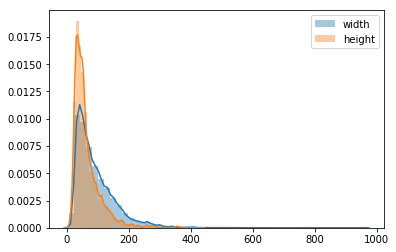

In [34]:
ax = sns.distplot([x[0] for x in img_shapes], label='width')
ax = sns.distplot([x[1] for x in img_shapes], label='height')
ax.legend()